# Capstone II: Craiglist Used Car Dataset

### Data Wrangling

Biman Mondal

Feb. 19, 2025

In [ ]:
#!pip install pandas
#!pip install missingno

In [1]:
# Import numpy package
import numpy as np
# Import pandas package
import pandas as pd
# Import matplotlib package
import matplotlib.pyplot as plt
# Import the seaborn package
import seaborn as sns
# Import ydata-profiling package
from ydata_profiling import ProfileReport
# Import missingno package
import missingno as msno
# Import datetime
import datetime as dt

C:\Users\AlexB\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [108]:
# Dataset .csv file downloaded from Kaggle: 
# https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
# Import data from local .csv file
#chunk_size = 1000 # 
vehicle_raw = pd.read_csv('./data/vehicles.csv')

### 0. View raw data

In [3]:
vehicle_raw.head().T

,0,1,2,3,4
id,7222695916,7218891961,7221797935,7222270760,7210384030
url,https://prescott.craigslist.org/cto/d/prescott...,https://fayar.craigslist.org/ctd/d/bentonville...,https://keys.craigslist.org/cto/d/summerland-k...,https://worcester.craigslist.org/cto/d/west-br...,https://greensboro.craigslist.org/cto/d/trinit...
region,prescott,fayetteville,florida keys,worcester / central MA,greensboro
region_url,https://prescott.craigslist.org,https://fayar.craigslist.org,https://keys.craigslist.org,https://worcester.craigslist.org,https://greensboro.craigslist.org
price,6000,11900,21000,1500,4900
year,NaN,NaN,NaN,NaN,NaN
manufacturer,NaN,NaN,NaN,NaN,NaN
model,NaN,NaN,NaN,NaN,NaN
condition,NaN,NaN,NaN,NaN,NaN
cylinders,NaN,NaN,NaN,NaN,NaN


In [112]:
# Get the data information
vehicle_raw.info()
raw_rows_cols = vehicle_raw.shape
print(f"\n\nThere are {raw_rows_cols[0]} rows and {raw_rows_cols[1]} columns in the dataset.")

<class 'pandas.core.frame.DataFrame'>
Index: 426810 entries, 27 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype                    
---  ------        --------------   -----                    
 0   id            426810 non-null  int64                    
 1   url           426810 non-null  object                   
 2   region        426810 non-null  object                   
 3   region_url    426810 non-null  object                   
 4   price         426810 non-null  int64                    
 5   year          425673 non-null  float64                  
 6   manufacturer  409232 non-null  object                   
 7   model         421601 non-null  object                   
 8   condition     252776 non-null  category                 
 9   cylinders     249202 non-null  category                 
 10  fuel          423865 non-null  category                 
 11  odometer      422478 non-null  float64                  
 12  title_status  418636

Look at the null values by dataframe columns.
Plot the number of missing values in the dataframe.

              missing_count
id                        0
url                       0
region                    0
region_url                0
price                     0
year                   1205
manufacturer          17646
model                  5277
condition            174104
cylinders            177678
fuel                   3013
odometer               4400
title_status           8242
transmission           2556
VIN                  161042
drive                130567
size                 306361
type                  92858
paint_color          130203
image_url                68
description              70
county               426880
state                     0
lat                    6549
long                   6549
posting_date             68


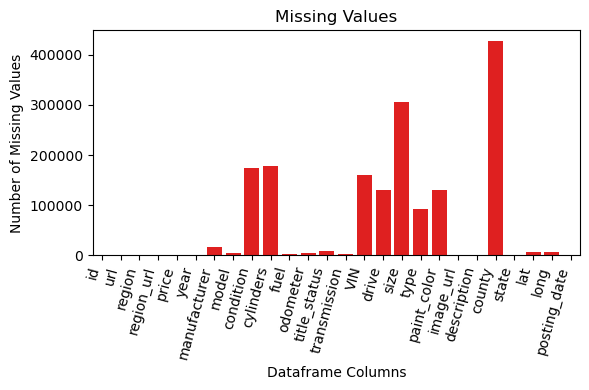

In [4]:
myfilter = pd.DataFrame(vehicle_raw.isnull().sum(),columns=['missing_count'])
print(myfilter)

# Calculate the number of missing values in each column
myfilter = pd.DataFrame(vehicle_raw.isnull().sum(), columns=['missing_count'])

# Create a bar plot using seaborn
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
sns.barplot(x=myfilter.index, y='missing_count', data=myfilter, color='red')

# Rotate x-axis labels and align them properly
plt.xticks(rotation=75, ha='right')

# Add labels and title
plt.title('Missing Values')
plt.xlabel('Dataframe Columns')
plt.ylabel('Number of Missing Values')

# Improve layout and display the plot
plt.tight_layout()  # Ensures labels fit within the figure
plt.show()

The full dataset has 26 columns and 426,810 rows. Many columns have incomplete data and the county column is missing all data. 

### 1.1 Convert data types

The posting_date will be converted to a datetime type and change the condition, fuel, size, and type as category data type.

In [11]:
# Convert data to datetime
#print(type(vehicle_raw['posting_date']))
vehicle_raw['posting_date'] = pd.to_datetime(vehicle_raw['posting_date'],errors='coerce')
#vehicle_raw.loc[10:20,'posting_date']
# Empty posting_dates are filled with "NaT" - "Not a time"

In [12]:
vehicle_raw['county'] = vehicle_raw['county'].astype('object')

### 1.2 Convert Columns to Category Type

In [ ]:
# Convert the posting_date column to datetime
# Change fuel tye, manufacturer, model, condition, cylinders
# Find data that doesn't have any description, year, manufacturer, and model and remove the data from the set

In [32]:
print(vehicle_raw["condition"].unique())
print(vehicle_raw["cylinders"].unique())
print(vehicle_raw["fuel"].unique())
print(vehicle_raw["type"].unique())
print(vehicle_raw["size"].unique())
print(vehicle_raw["title_status"].unique())
print(vehicle_raw["transmission"].unique())
print(vehicle_raw["drive"].unique())
print(vehicle_raw["manufacturer"].unique())

[NaN, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage']
Categories (6, object): ['excellent', 'fair', 'good', 'like new', 'new', 'salvage']
[NaN, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders', 'other', '3 cylinders', '10 cylinders', '12 cylinders']
Categories (8, object): ['10 cylinders', '12 cylinders', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', 'other']
[NaN, 'gas', 'other', 'diesel', 'hybrid', 'electric']
Categories (5, object): ['diesel', 'electric', 'gas', 'hybrid', 'other']
[NaN, 'pickup', 'truck', 'other', 'coupe', ..., 'offroad', 'bus', 'van', 'convertible', 'wagon']
Length: 14
Categories (13, object): ['SUV', 'bus', 'convertible', 'coupe', ..., 'sedan', 'truck', 'van', 'wagon']
[NaN, 'full-size', 'mid-size', 'compact', 'sub-compact']
Categories (4, object): ['compact', 'full-size', 'mid-size', 'sub-compact']
[NaN, 'clean', 'rebuilt', 'lien', 'salvage', 'missing', 'parts only']
Categories (6, object): ['clean', 'lien', 'miss

In [33]:
# Convert the following columns to category
# Select all columns which have finite set of values
list_of_columns = ["manufacturer","condition","cylinders", "fuel", "title_status", "transmission", "drive", "size", "type", "state"]
vehicle_raw[list_of_columns] = vehicle_raw[list_of_columns].astype('category')

In [16]:
vehicle_raw["manufacturer"].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'datsun',
       'aston-martin', 'land rover'], dtype=object)

In [14]:
# Drop harley-davidson rows since it is a motorcycle manufacturer and no need to include Morgan as it's a older model
find_harley_morgan = (vehicle_raw["manufacturer"] == 'harley-davidson') | (vehicle_raw['manufacturer']== 'morgan')
find_harley = vehicle_raw.loc[find_harley_morgan, 'manufacturer']
print(f'There are {find_harley.count()} Harley-Davidson/Morgan vehicle counts')
#vehicle_raw.drop(find_harley_morgan,inplace=True)
vehicle_raw.drop(find_harley.index,inplace=True)

There are 0 Harley-Davidson/Morgan vehicle counts


In [94]:
vehicle_raw.loc[vehicle_raw["type"]=="bus",["price","manufacturer","model"]]

,price,manufacturer,model
95,6800,NaN,blue bird bus
228,500,NaN,SPECIAL FINANCE PROGRAM 2020
318,500,NaN,SPECIAL FINANCE PROGRAM 2020
359,500,NaN,SPECIAL FINANCE PROGRAM 2020
374,6800,NaN,blue bird bus
...,...,...,...
424857,0,dodge,pickups
424992,7900,NaN,IC CE PB105
425107,0,dodge,pickups
425513,0,dodge,pickups


### 1.2.1 Remove rows with zero price

In [97]:
# Drop all vehicles with zero price as it does not help to model accurate
# There are 32,874 rows of vehicles listed with zero
zero_price = vehicle_raw.loc[vehicle_raw["price"]==0,["price","manufacturer","model","description"]]
vehicle_raw.drop(zero_price.index,inplace=True)

In [99]:
# vehicle_raw["posting_date"].describe()
vehicle_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393780 entries, 0 to 426653
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype                    
---  ------        --------------   -----                    
 0   id            393780 non-null  int64                    
 1   url           393780 non-null  object                   
 2   region        393780 non-null  object                   
 3   region_url    393780 non-null  object                   
 4   price         393780 non-null  int64                    
 5   year          392669 non-null  float64                  
 6   manufacturer  377657 non-null  category                 
 7   model         389153 non-null  object                   
 8   condition     242513 non-null  category                 
 9   cylinders     233518 non-null  category                 
 10  fuel          391252 non-null  category                 
 11  odometer      391552 non-null  float64                  
 12  title_status  386108 

### 1.3 Remove rows with empty description field

In [100]:
# Drop all data associated with an empty description
# ~ 70 rows
#condition = vehicle_raw['description'].isnull() & vehicle_raw['manufacturer'].isnull()
nul_description = vehicle_raw['description'].isnull()
vehicle_raw[nul_description].head()
vehicle_raw.drop(vehicle_raw[nul_description].index,inplace=True)
vehicle_raw.reset_index(drop=True,inplace=True) 
#missing_data.head()

In [101]:
# Reset index
#vehicle_raw = vehicle_raw.drop(['level_0', 'index'],axis=1)
#vehicle_raw.head()
vehicle_raw.head().T

,0,1,2,3,4
id,7316814884,7316814758,7316814989,7316743432,7316356412
url,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/cto/d/auburn-uni...
region,auburn,auburn,auburn,auburn,auburn
region_url,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org
price,33590,22590,39590,30990,15000
year,2014.0,2010.0,2020.0,2017.0,2013.0
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders


In [102]:
row_col_count = vehicle_raw.shape
print(f"\nThere are {row_col_count[0]} rows and {row_col_count[1]} columns in the dataset.")


There are 393780 rows and 26 columns in the dataset.


### 2.1 Fill Missing Lat/Long Values

There are lat/long values missing. Find them from the other rows in the dataframe.

In [104]:
# Identify all the uniquely empty fields in latitude and longitude 
filter_missing_lat = vehicle_raw['long'].isnull()
# Find the associated region and state and create a dataframe
regions_state_missing_lat = vehicle_raw.loc[filter_missing_lat,['region','state','lat','long']]
# Create a dataset with unique empty lat/long combinations
regions_state_missing_lat = regions_state_missing_lat.drop_duplicates()
print(regions_state_missing_lat.head(10))
# Print statement
print(f'\n\nThere are {regions_state_missing_lat.shape[0]} unique missing values in the lat/long columns.')

#state_missing_lat = vehicle_raw.loc[missing_lat,'state']
#print(regions_state_missing_lat[200:220])
#print(state_missing_lat[0:10])
#print(vehicle_raw.loc[vehicle_raw['lat'].notna(),'region'].count())

Empty DataFrame
Columns: [region, state, lat, long]
Index: []


There are 0 unique missing values in the lat/long columns.


In [105]:
# Create a function that looks up the value of the latitude/longitude from master dataset rows with complete values of the same region/state combination
# Supply the raw data frame and the region and state of 
def fill_lat_long(df,region,state):
    # Filter data so that the region and state match and that the latitude is null
    myfilter = (df['region']== region) & (df['state']== state) & (~df['lat'].isnull())
    # Find the data in the data in the full dataframe
    valid_lat_lon = df.loc[myfilter,['region','state','lat','long']]
    
    # Calculate the median of the values to replace the lat/lon
    median_lat = valid_lat_lon['lat'].median()
    median_long = valid_lat_lon['long'].median()
    return pd.Series([median_lat, median_long])


In [106]:
# Replace the empy lat/long values from the data 
regions_state_missing_lat[['lat','long']]=regions_state_missing_lat.apply(lambda row: fill_lat_long(vehicle_raw.copy(),row.region,row.state),axis=1)
# All missing latitude/longitude in the missing dataframe have been replaced
regions_state_missing_lat['long'].isnull().sum()

ValueError: Columns must be same length as key

In [45]:
#regions_state_missing_lat['long'].isnull().sum()
#print(regions_state_missing_lat.tail())
#print(vehicle_raw.loc[vehicle_raw['lat'].isna(),['region','state','lat','long']])
#vehicle_raw.loc[vehicle_raw['region']=='prescott']

0

In [49]:
#reg_state_lat_long = vehicle_raw[['region','state','lat','long']].copy()
#vehicle_raw[['lat','long']]=vehicle_raw.apply(lambda row: fill_lat_long(reg_state_lat_long,row.region,row.state),axis=1)

In [51]:
# Merge the complete (no missing lat/long) columns to the full dataframe
raw_df_subset = vehicle_raw[['region','state','lat','long']].copy()
print(f"There are {raw_df_subset['long'].isnull().sum()} missing lat/long rows")

# Merge the data from the filled lat/long dataframe on region and state
merged_df = raw_df_subset.merge(regions_state_missing_lat, on=['region','state'], how='left', suffixes=('', '_from_df1'))
# Combine the columns
merged_df['lat'] = merged_df['lat'].combine_first(merged_df['lat_from_df1'])
merged_df['long'] = merged_df['long'].combine_first(merged_df['long_from_df1'])
# Drop the temporary columns from the merge
merged_df = merged_df.drop(columns=['lat_from_df1', 'long_from_df1'])

print(merged_df.head())
print(f"There are {merged_df['lat'].isnull().sum()} missing lat/long rows")

There are 6480 missing lat/long rows
   region state     lat     long
0  auburn    al  32.590 -85.4800
1  auburn    al  32.590 -85.4800
2  auburn    al  32.590 -85.4800
3  auburn    al  32.590 -85.4800
4  auburn    al  32.592 -85.5189
There are 0 missing lat/long rows


In [52]:
# Replace the larger dataset lat/long columns
vehicle_raw[['lat','long']]=merged_df[['lat','long']]

### 2.2 Find County Values from Region/State pair

The county field is completely empty in the dataset. Although not fully necessary, it can be found through the region and state. 
Viewing the regions of missing lat/long pairs shows that some regions have a "/" and some have "-". Some regions are also the county of the state.
So the first task is to create a function that splits the region, determines if the region is a county, and then if it is not a county send a request to the geopy api to determine the county name.


In [53]:
# Create a dataframe of zip, lat, lon, city, state, county 
# Data from github project: https://github.com/millbj92/US-Zip-Codes-JSON
# Read .json file 
us_df = pd.read_json('./US-Zip-Codes-JSON-master/USCities.json')

In [54]:
# Convert all city, state, county to lower case
us_df[["city","state","county"]] = us_df[["city","state","county"]].apply(lambda row: row.str.lower())
us_df.head()

,zip_code,latitude,longitude,city,state,county
0,501,40.922326,-72.637078,holtsville,ny,suffolk
1,544,40.922326,-72.637078,holtsville,ny,suffolk
2,601,18.165273,-66.722583,adjuntas,pr,adjuntas
3,602,18.393103,-67.180953,aguada,pr,aguada
4,603,18.455913,-67.14578,aguadilla,pr,aguadilla


### 2.2.1 Subset the original vehicle dataset to unique region/state pairs

In [55]:
# Reduce the craiglist dataset to unique pairs of region-state
region_state = vehicle_raw[['region','state']]
print(f"Original dataset has: {region_state.shape[0]} rows")
unique_region_state = region_state.drop_duplicates()
print(f"Reduced dataframe has: {unique_region_state.shape[0]} rows")
unique_region_state.head()

Original dataset has: 426654 rows
Reduced dataframe has: 426 rows


,region,state
0,auburn,al
142,birmingham,al
1789,dothan,al
2114,florence / muscle shoals,al
2279,gadsden-anniston,al


Reducing the dataset to unique region will decrease the number of queries between dataframes.

In [ ]:
# Find all the regions within a given state
#unique_region_state.loc[unique_region_state['state']=="oh","region"]

In [ ]:
#my_condition = (us_df['city'].str.contains("chicago")) & (us_df['state']=="il")
#unique_vals = us_df.loc[my_condition,"county"].unique()
#print(unique_vals)
#len(us_df.loc[my_condition,"county"].unique())

In [ ]:
#foo = pd.Series(us_df.loc[my_condition,"county"])
#print(foo.describe())
#print(foo.describe().top)

In [ ]:
#county = lookup_func(us_df,"detroit","mi",1)
#unique_region_state.head()

In [61]:
# Split the region into a list of multiple values
unique_region_state.loc[:,"split_region"] = unique_region_state["region"].str.split(r"[/|-]",expand=False)
unique_region_state.head()

C:\Users\AlexB\AppData\Local\Temp\ipykernel_4252\508483814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_region_state.loc[:,"split_region"] = unique_region_state["region"].str.split(r"[/|-]",expand=False)


,region,state,split_region
0,auburn,al,[auburn]
142,birmingham,al,[birmingham]
1789,dothan,al,[dothan]
2114,florence / muscle shoals,al,"[florence , muscle shoals]"
2279,gadsden-anniston,al,"[gadsden, anniston]"


In [62]:
#Create a function that looks up state-region dataframe
def lookup_func(df,region,state,item):
    # Choose what to output from the dataframe
    if item == 1:
        find_val = "county"
    elif item == 2:
        find_val = "latitude"
    elif item == 3:
        find_val = "longitude"
    elif item == 4:
        find_val = "zip code"
    else: 
        raise ValueError("Item value must be 1-4")
    
    # There is only a single item in the split_region
    my_condition = (df['city'].str.match(region)) & (df['state']==state)
    # 
    county_list = pd.Series(df.loc[my_condition,find_val])
    # The .describe().top method returns the most frequent county in that region
    return county_list.describe().top

### 2.2.2 Apply a lookup function to find the county

In [63]:
# Assign the county value using applying lookup function to each row
unique_region_state.loc[:,"county"] = unique_region_state.apply(lambda row: lookup_func(us_df,str.strip(row.split_region[0]),row.state,1),axis=1)

C:\Users\AlexB\AppData\Local\Temp\ipykernel_4252\2669810306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_region_state.loc[:,"county"] = unique_region_state.apply(lambda row: lookup_func(us_df,str.strip(row.split_region[0]),row.state,1),axis=1)


In [64]:
# Sum the null values in county column
print(f'There are still: {unique_region_state["county"].isna().sum()} counties that are NaN.')

There are still: 117 counties that are NaN.


In [65]:
# Find region that says "county"
# Replace that row in the county column with the region
region_includes_county = unique_region_state['region'].str.contains('county')
unique_region_state.loc[region_includes_county,"county"] = unique_region_state.loc[region_includes_county,"region"]
#unique_region_state.tail()

In [66]:
# Sum the null values in county column
print(f'There are still: {unique_region_state["county"].isna().sum()} counties that are NaN.')

There are still: 110 counties that are NaN.


In [67]:
# Merge the complete (no missing lat/long) columns to the full dataframe
raw_df_subset = vehicle_raw[['region','state','county']].copy()
# Merge the data from the filled lat/long dataframe on region and state
merged_df = raw_df_subset.merge(unique_region_state, on=['region','state'], how='left', suffixes=('', '_filled'))
# Combine the columns
merged_df['county'] = merged_df['county'].combine_first(merged_df['county_filled'])
# Drop the temporary columns from the merge
merged_df = merged_df.drop(columns=['county_filled', 'split_region'])
merged_df.head()

,region,state,county
0,auburn,al,lee
1,auburn,al,lee
2,auburn,al,lee
3,auburn,al,lee
4,auburn,al,lee


In [68]:
# Replace the county column in the raw dataset
vehicle_raw['county'] = merged_df['county']
vehicle_raw.head().T

,0,1,2,3,4
id,7316814884,7316814758,7316814989,7316743432,7316356412
url,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/cto/d/auburn-uni...
region,auburn,auburn,auburn,auburn,auburn
region_url,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org
price,33590,22590,39590,30990,15000
year,2014.0,2010.0,2020.0,2017.0,2013.0
manufacturer,gmc,chevrolet,chevrolet,toyota,ford
model,sierra 1500 crew cab slt,silverado 1500,silverado 1500 crew,tundra double cab sr,f-150 xlt
condition,good,good,good,good,excellent
cylinders,8 cylinders,8 cylinders,8 cylinders,8 cylinders,6 cylinders


### 3. Plot missing data in data frame

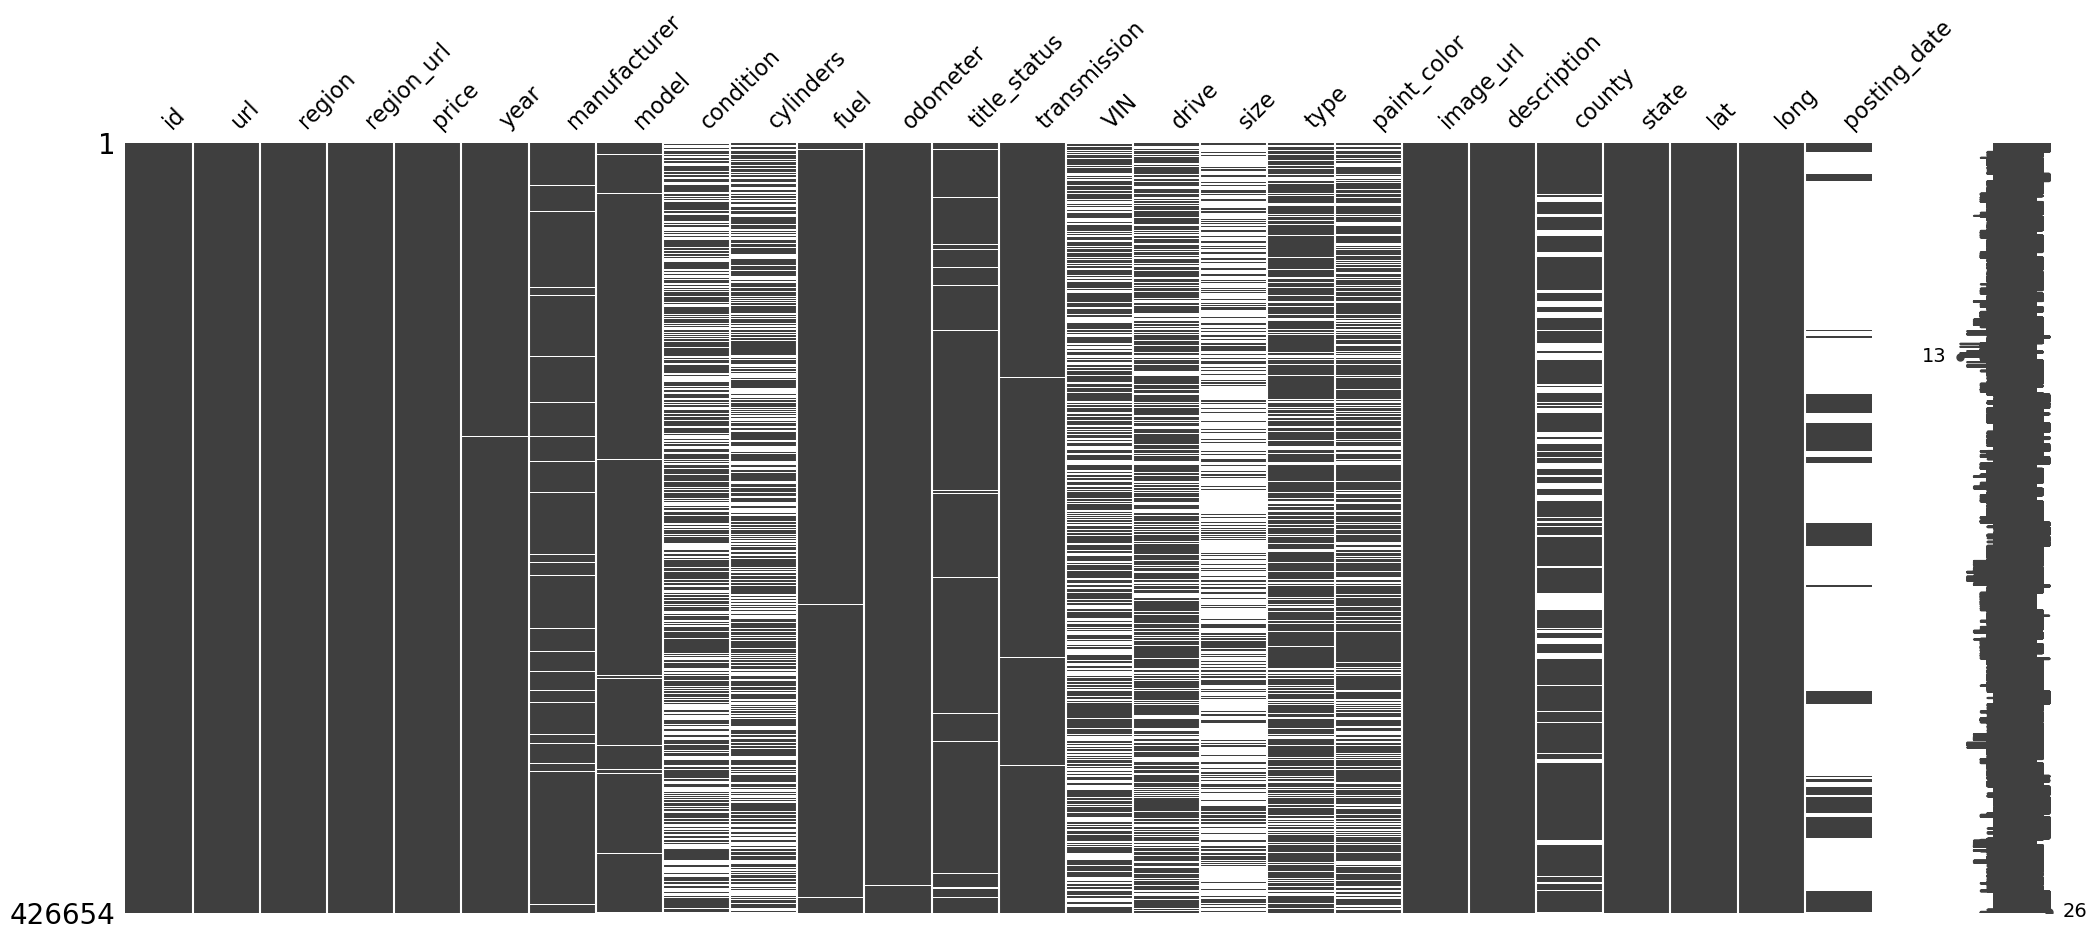

In [69]:
msno.matrix(vehicle_raw)
plt.show()

### 4. Drop a random 50% of dataset to decrease read/write time

In [80]:
### 5. Create a new dataframe by randomly halving the data 
numrows,_ = vehicle_raw.shape
print(numrows)
rand_rows = np.random.randint(numrows, size=numrows)
#vehicle_raw.index[rand_rows]
vehicle_df = vehicle_raw.drop(vehicle_raw.index[rand_rows])
#num_rows,_ = vehicle_df.shape
print(vehicle_df.shape)

426654
(157002, 26)


In [79]:
# Write the subset of the data to .csv file
vehicle_df.to_csv('./data/wrangled_vehicles.csv')

### 5. Summary
The raw dataset has been investigated in this notebook. The missing data from the county and lat/long columns have been filled. The datatypes of the columns have been categorized. Null data has been removed in three columns but there are still more missing/incorrect values; for one, the model values are not all correctly standardized (F-150 vs. 150). 
